In [10]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import pickle
import os,sys
import pyxdf as xdf
import torch
from torch.utils.data import DataLoader
import seaborn as sns
from sklearn.metrics import mean_squared_error
sys.path.append("../models/model_based_files/")
#sys.path.append("../models/Data_based_models/transformer_1/")
sys.path.append("../models/Data_based_models/CNN8/")
from Speed_Recognition_3 import SpeedRecProcessing as SRP
from model_2 import Speed_model_2 as SP
from model2 import CNN as CLSTM
#from model2 import CNN_LSTM as CLSTM
from preprocessing1 import preprocess,split
from dataset import IMU

In [9]:
t=np.arange(0,1,1/200)
time=np.repeat(t,3,axis=0).reshape(3,1,200)
print(time.shape)
#plt.plot(time[1,:])

(3, 1, 200)


In [2]:
X,Y=preprocess()

Exception: file ../../../Recordings/sub-P001/ses-S001/sub-P001_ses-S001_task-Default_run-010_eeg.xdf does not exist.

# Directory Information

In [2]:
sub_1=os.listdir("../Recordings/sub-P001/")
sub_2=os.listdir("../Recordings/sub-P002/")
sub_3=os.listdir("../Recordings/sub-P003/")
sub_5=os.listdir("../Recordings/sub-P005/")

print(sub_1)
print(sub_2)
print(sub_3)
print(sub_5)

['sub-P001_ses-S001_task-Default_run-011_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-001_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-013_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-009_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-003_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-010_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-008_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-002_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-005_eeg.xdf', 'aug_data', 'sub-P001_ses-S001_task-Default_run-006_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-004_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-007_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-012_eeg.xdf']
['sub-P001_ses-S001_task-Default_run-011_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-001_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-013_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-009_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-003_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-010_eeg.xdf', 'sub-P001_ses-S001_task-Default_run-

# Simulations and plotting

2023-03-06 22:47:03.369 (  31.390s) [python          ]      netinterfaces.cpp:91    INFO| netif 'lo' (status: 0, multicast: 1, broadcast: 0)
2023-03-06 22:47:03.369 (  31.390s) [python          ]      netinterfaces.cpp:91    INFO| netif 'wlo1' (status: 4096, multicast: 1, broadcast: 2)
2023-03-06 22:47:03.369 (  31.390s) [python          ]      netinterfaces.cpp:91    INFO| netif 'lo' (status: 0, multicast: 1, broadcast: 0)
2023-03-06 22:47:03.369 (  31.390s) [python          ]      netinterfaces.cpp:91    INFO| netif 'wlo1' (status: 4096, multicast: 1, broadcast: 2)
2023-03-06 22:47:03.369 (  31.390s) [python          ]      netinterfaces.cpp:102   INFO| 	IPv4 addr: a00009c
2023-03-06 22:47:03.369 (  31.390s) [python          ]      netinterfaces.cpp:91    INFO| netif 'lo' (status: 0, multicast: 1, broadcast: 0)
2023-03-06 22:47:03.369 (  31.390s) [python          ]      netinterfaces.cpp:91    INFO| netif 'wlo1' (status: 4096, multicast: 1, broadcast: 2)
2023-03-06 22:47:03.370 (  31

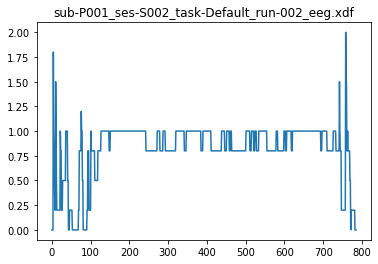

2023-03-06 22:47:04.920 (  32.941s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:04.920 (  32.941s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:04.920 (  32.941s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:04.920 (  32.941s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:04.920 

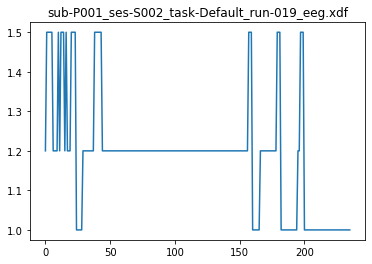

2023-03-06 22:47:05.506 (  33.527s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:05.506 (  33.527s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:05.506 (  33.527s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:05.506 (  33.527s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:05.506 

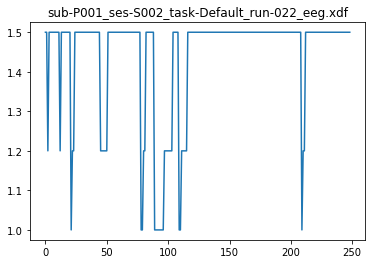

2023-03-06 22:47:06.102 (  34.123s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:06.102 (  34.123s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:06.103 (  34.123s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:06.103 (  34.123s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:06.103 

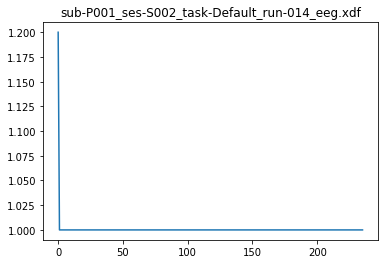

2023-03-06 22:47:06.671 (  34.692s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:06.671 (  34.692s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:06.671 (  34.692s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:06.671 (  34.692s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:06.671 

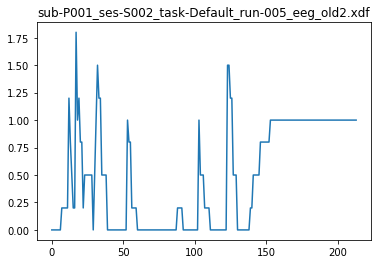

2023-03-06 22:47:07.269 (  35.290s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:07.269 (  35.290s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:07.269 (  35.290s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:07.269 (  35.290s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:07.269 

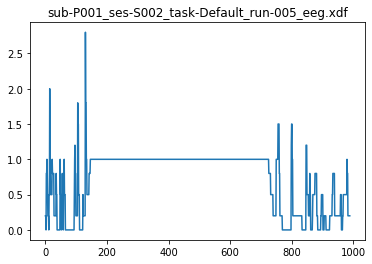

2023-03-06 22:47:09.082 (  37.102s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:09.082 (  37.102s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:09.082 (  37.102s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:09.082 (  37.102s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:09.082 

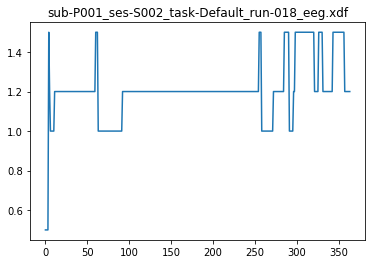

2023-03-06 22:47:09.888 (  37.908s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:09.888 (  37.908s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:09.888 (  37.908s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:09.888 (  37.908s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:09.888 

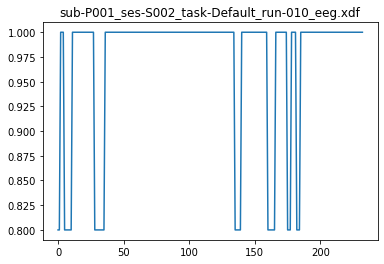

2023-03-06 22:47:10.495 (  38.516s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:10.495 (  38.516s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:10.495 (  38.516s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:10.495 (  38.516s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:10.495 

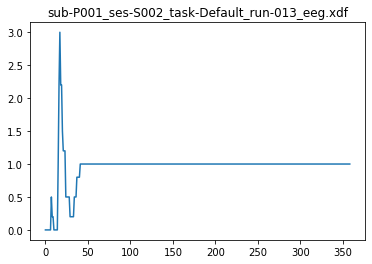

2023-03-06 22:47:11.291 (  39.312s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:11.291 (  39.312s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:11.291 (  39.312s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:11.291 (  39.312s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:11.291 

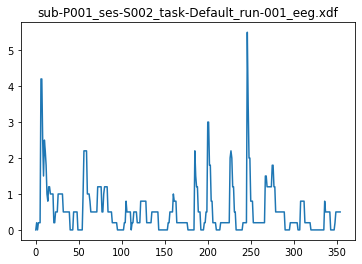

2023-03-06 22:47:12.077 (  40.098s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:12.077 (  40.098s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:12.077 (  40.098s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:12.077 (  40.098s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:12.077 

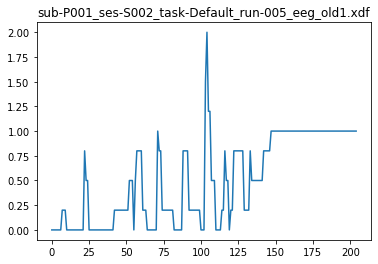

2023-03-06 22:47:12.627 (  40.648s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:12.627 (  40.648s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:12.627 (  40.648s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:12.627 (  40.648s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:12.627 

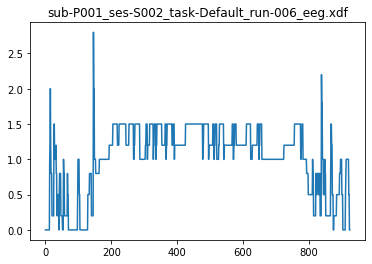

2023-03-06 22:47:14.331 (  42.351s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:14.331 (  42.351s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:14.331 (  42.351s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:14.331 (  42.351s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:14.331 

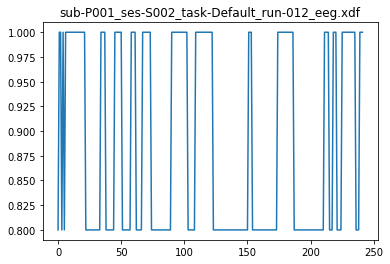

2023-03-06 22:47:14.922 (  42.943s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:14.922 (  42.943s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:14.922 (  42.943s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:14.922 (  42.943s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:14.922 

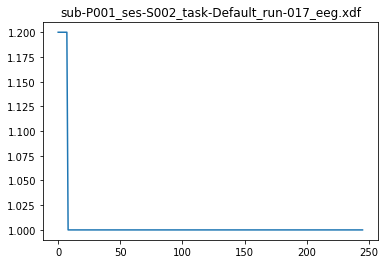

2023-03-06 22:47:15.501 (  43.522s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:15.501 (  43.522s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:15.501 (  43.522s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:15.501 (  43.522s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:15.501 

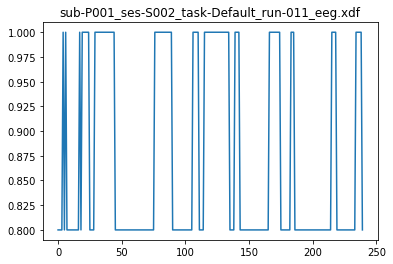

2023-03-06 22:47:16.087 (  44.107s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:16.087 (  44.107s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:16.087 (  44.108s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:16.087 (  44.108s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:16.087 

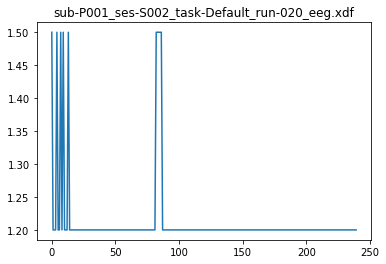

2023-03-06 22:47:16.655 (  44.676s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:16.655 (  44.676s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:16.655 (  44.676s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:16.655 (  44.676s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:16.655 

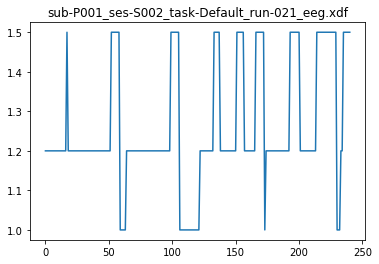

2023-03-06 22:47:17.232 (  45.253s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:17.232 (  45.253s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:17.232 (  45.253s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:17.232 (  45.253s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:17.232 

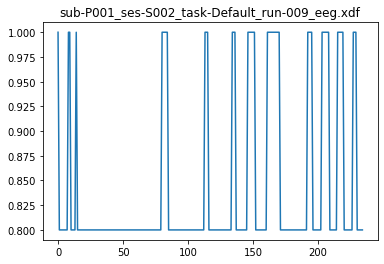

2023-03-06 22:47:17.807 (  45.828s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:17.807 (  45.828s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:17.807 (  45.828s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:17.807 (  45.828s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:17.807 

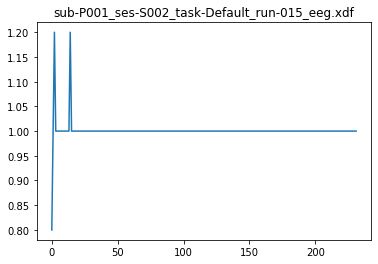

2023-03-06 22:47:18.385 (  46.406s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:18.385 (  46.406s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:18.385 (  46.406s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:18.385 (  46.406s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:18.385 

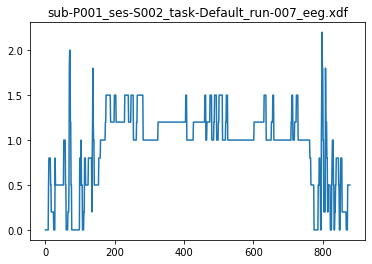

2023-03-06 22:47:20.063 (  48.084s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:20.063 (  48.084s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:20.063 (  48.084s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:20.064 (  48.084s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:20.064 

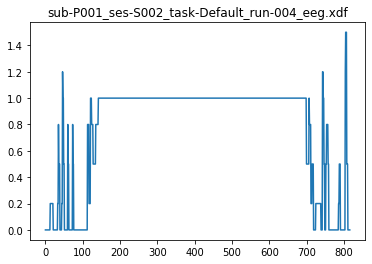

2023-03-06 22:47:21.639 (  49.660s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:21.639 (  49.660s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:21.639 (  49.660s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:21.639 (  49.660s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:21.639 

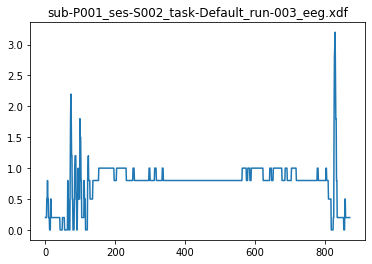

2023-03-06 22:47:23.229 (  51.250s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:23.229 (  51.250s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:23.229 (  51.250s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:23.230 (  51.250s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:23.230 

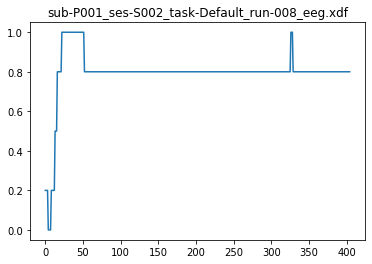

2023-03-06 22:47:24.079 (  52.100s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:24.079 (  52.100s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:7246:405e:e84d:ef0d (Address already in use)
2023-03-06 22:47:24.079 (  52.100s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fe80::41c3:d5af:4c17:6a71%wlo1 (Address already in use)
2023-03-06 22:47:24.079 (  52.100s) [python          ]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 2601:241:8200:b100:47b1:c898:8be4:ed65 (Address already in use)
2023-03-06 22:47:24.079 

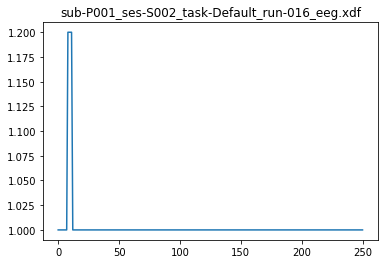

In [3]:

for file in sub_5:
    x1=SRP(h=110,c=0.5)
    data=x1.Speed_estimation_simulation(filepath='../Recordings/sub-P005/'+file,r_number=0.25)
    plt.figure()
    plt.plot(data['Double'])
    plt.title(file)
    plt.show()

# Data Prep

In [24]:
run=22
path=f'../Recordings/sub-P005/sub-P001_ses-S002_task-Default_run-0{run}_eeg.xdf'
#path1='../Recordings/sub-P003/sub-P002_ses-S002_task-Default_run-007_eeg_old1.xdf'
streams, fileheader = xdf.load_xdf(path)
for stream in streams:
    if stream['info']['name'][0]=='polar accel':
        print('here')
        data=stream['time_series']
        length=data.shape[0]
        data=data[int(0.05*length):int(0.95*length),:]
        print(data.shape)
        label=2
        dic={'data':data,'label':label}
with open(f'../Recordings/sub-P005/pickled_data/{run}.pickle','wb') as f:
    pickle.dump(dic,f)

here
(23133, 3)


# Data Loading

In [142]:
run=7
path=f'../Recordings/sub-P005/pickled_data/{run}.pickle'

with open(path,'rb') as f:
    d=pickle.load(f)
    print('here')
    

data=d['data']


here


In [51]:
run=2
path=f'../Recordings/sub-P005/pickled_data/{run}.pickle'

with open(path,'rb') as f:
    d=pickle.load(f)
    print('here')
    

data=np.concatenate((data,d['data']),axis=0)


here


In [28]:
run=6
path=f'../Recordings/sub-Test_sub2_ses-S001_task-Default_run-00{run}_eeg.xdf'

data,header=xdf.load_xdf(path)

for stream in data:
    if stream['info']['name'][0]=='imu_stream_new':
        imu_data=stream['time_series']
        print('imu data')
    if stream['info']['name'][0]=='polar accel':
        polar_data=stream['time_series']
        print('polar data')
data=polar_data

polar data


In [13]:
norm=pickle.load(open('../models/Data_based_models/CNN7/normalizer.pickle','rb'))

In [29]:
X,Y=split(data,1
          ,window=1,sample_rate=200,vert_acc_i=0,interval=0.3)
#test_dataset=IMU(X,Y,size=400,num_features=6)
#test_loader=DataLoader(test_dataset,batch_size=1)
t=np.arange(0,1,1/200)
X=X.reshape(X.shape[0],3,200)
time=np.repeat(t,X.shape[0],axis=0).reshape(X.shape[0],1,200)
X=np.concatenate((X,time),axis=1)
X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=norm.fit_transform(X)
X=X.reshape(X.shape[0],4,200)[20:,:,:]
print(X.shape)

(165, 4, 200)


# Model Loading

In [17]:
model=CLSTM(input_features=4,input_length=200,num_classes=1)

model.load_state_dict(torch.load("../models/Data_based_models/CNN8/model_1_19.h5"))

<All keys matched successfully>

In [30]:
model.eval()
X=X.reshape((-1,4,200))
preds=[]
confidences=[]
with torch.no_grad():
    for i in range(X.shape[0]):
        output=model.forward_run(X[i,:,:])
        #print(output.shape)
        #_,prediction=torch.max(output.data,1)
        #confidences+=[output[:,prediction.detach().cpu()].detach().cpu()]
        preds+=output.detach().cpu()
        #preds=output.detach().cpu().numpy()
        

In [19]:
def Kalman_1D(state,measurement,process_var=0.005**2,measurement_var=0.05**2):
        estimate=[[],[]]
        state[0],state[1]=state[0]+0,state[1]+process_var
        estimate[0],estimate[1]=(state[1]*measurement+measurement_var*state[0])/(state[1]+measurement_var),(state[1]*measurement_var)/(state[1]+measurement_var)
        state=estimate

        return state



In [31]:
values=[]
for i,v in enumerate(preds):
    if i==0:
        state=[v,0.1**2]
        values+=[v]
    else:
        state=Kalman_1D(state,v)
        values+=[state[0]]

In [10]:
insatance=SRP(h=110,
              c=1.5)
speeds=insatance.Speed_estimation_simulation(data=data[:,0],split_interval=0.5,r_number=0.25,data_flag=True)

2023-03-21 22:29:48.096 ( 161.588s) [python          ]      netinterfaces.cpp:91    INFO| netif 'lo' (status: 0, multicast: 1, broadcast: 0)
2023-03-21 22:29:48.096 ( 161.588s) [python          ]      netinterfaces.cpp:91    INFO| netif 'wlo1' (status: 4096, multicast: 1, broadcast: 2)
2023-03-21 22:29:48.096 ( 161.588s) [python          ]      netinterfaces.cpp:91    INFO| netif 'lo' (status: 0, multicast: 1, broadcast: 0)
2023-03-21 22:29:48.096 ( 161.588s) [python          ]      netinterfaces.cpp:91    INFO| netif 'wlo1' (status: 4096, multicast: 1, broadcast: 2)
2023-03-21 22:29:48.096 ( 161.588s) [python          ]      netinterfaces.cpp:102   INFO| 	IPv4 addr: a00009c
2023-03-21 22:29:48.096 ( 161.588s) [python          ]      netinterfaces.cpp:91    INFO| netif 'lo' (status: 0, multicast: 1, broadcast: 0)
2023-03-21 22:29:48.096 ( 161.588s) [python          ]      netinterfaces.cpp:91    INFO| netif 'wlo1' (status: 4096, multicast: 1, broadcast: 2)
2023-03-21 22:29:48.096 ( 161

In [42]:
for i,v in enumerate(preds):
    if v==0:
        preds[i]=1
    elif v==1:
        preds[i]=1.25
    elif v==2:
        preds[i]=1.5
    elif v==3:
        preds[i]=0.5
    elif v==4:
        preds[i]=0.75

#    if i!=0 and confidences[i]<0.98:
#        preds[i]=preds[i-1]
#pickle.dump(preds,open('preds_t.pickle','wb'))

(0.0, 2.0)

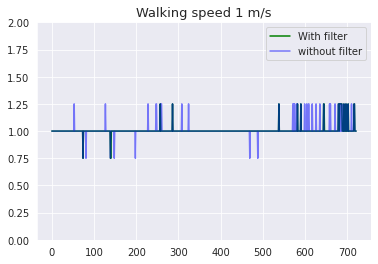

In [43]:
preds1=pickle.load(open('preds_t.pickle','rb'))

plt.plot(preds1,'g')
plt.plot(preds,'b',alpha=0.5)
plt.legend(['With filter','without filter'])
plt.title('Walking speed 1 m/s')
plt.ylim(0,2)

In [24]:
def get_speeds(preds,confidences,threshold=0.8):

    if i!=0 and confidences[i]<threshold:
        preds[i]=preds[i-1]

    return preds

In [96]:
def get_speed(preds1,confidences,threshold):
    pred=[]
    for i,v in enumerate(preds1):
        if v==0:
            pred.append(1)
        elif v==1:
            pred.append(1.25)
        elif v==2:
            pred.append(1.5)
        elif v==3:
            pred.append(0.5)
        elif v==4:
            pred.append(0.75)
        
        if i!=0 and confidences[i]<threshold:
            pred[i]=preds1[i-1]
    return pred

In [106]:
preds1=get_speed(preds,confidences,0.5)
pred2=get_speed(preds,confidences,0.6)
pred3=get_speed(preds,confidences,0.7)
pred4=get_speed(preds,confidences,0.8)
pred5=get_speed(preds,confidences,0.9)
pred6=get_speed(preds,confidences,0.95)
pred7=get_speed(preds,confidences,0.98)


(0.0, 2.5)

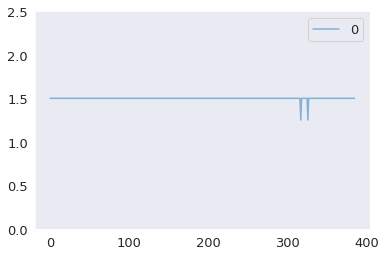

In [110]:
#plt.plot(preds1,alpha=0.5)
#plt.plot(pred2)
#plt.plot(pred3)
#plt.plot(pred4)
#plt.plot(pred5,alpha=0.5)
#plt.plot(pred6,alpha=0.5)
#plt.plot(pred7,alpha=0.5)
plt.plot(get_speed(preds,confidences,0),alpha=0.5)
plt.legend(['0'])
plt.ylim(0,2.5)

In [21]:
def threshold(x,a=0.01):
    return np.round(np.round(x/a)*a,3)

def l_threshold(l,a=0.01):
    return [threshold(x,a) for x in l]

(0.2, 2.0)

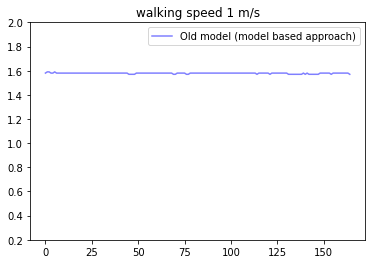

In [32]:
#plt.plot(speeds['Double'],'g',alpha=0.5)
plt.plot(l_threshold(values),'b',alpha=0.5)
plt.legend(['Old model (model based approach)','new model'])
plt.title('walking speed 1 m/s')
plt.ylim([0.2,2.0])


In [39]:
mse=mean_squared_error(1.25*np.ones(len(values[10:])),l_threshold(values[10:]))
print(mse)
print(np.sqrt(mse))
print(np.std(values))
print(np.mean(values))

0.0013865827211532178
0.03723684628366395
0.009180553
1.2130688


In [42]:
confidenc_list=np.arange(0.8,1.0,0.02)
labels,outputs=[],[]

for h in confidenc_list:
    lab=[]
    out=[]
    for i in range(2,9):
        d=pickle.load(open(f'../Recordings/sub-P005/pickled_data/{i}.pickle','rb'))
        data=d['data']
        label=d['label']
        X,Y=split(data,label
            ,window=0.5,sample_rate=200,vert_acc_i=0,interval=0.3)
    #test_dataset=IMU(X,Y,size=400,num_features=6)
    #test_loader=DataLoader(test_dataset,batch_size=1)
        X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
        X=norm.fit_transform(X)
        X=X.reshape(X.shape[0],3,100)
        print(X.shape)
        model.eval()
        X=X.reshape((-1,3,100))
        preds=[]
        confidences=[]
        with torch.no_grad():
            for j in range(X.shape[0]):
                output=model.forward_run(X[j,:,:])
                #print(output.shape)
                _,prediction=torch.max(output.data,1)
                confidences+=[output[:,prediction.detach().cpu()].detach().cpu()]
                preds+=prediction.detach().cpu()
                #preds=output.detach().cpu().numpy()
        preds=get_speeds(preds,confidences,threshold=h)
        lab+=[label for i in range(len(preds))]
        out+=preds

    labels.append(lab)
    outputs.append(out)

        
    
    
    


(649, 3, 100)
(722, 3, 100)
(675, 3, 100)
(670, 3, 100)
(688, 3, 100)
(653, 3, 100)
(538, 3, 100)
(649, 3, 100)
(722, 3, 100)
(675, 3, 100)
(670, 3, 100)
(688, 3, 100)
(653, 3, 100)
(538, 3, 100)
(649, 3, 100)


KeyboardInterrupt: 

In [30]:
from sklearn.metrics import classification_report
class_reports=[]
for i in range(len(confidenc_list)):
    
    class_reports.append(classification_report(labels[i],outputs[i],output_dict=True))



/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

{'0': {'precision': 0.9439912996193583, 'recall': 0.9093766369827134, 'f1-score': 0.9263607257203842, 'support': 1909}, '1': {'precision': 0.8776758409785933, 'recall': 0.8535315985130112, 'f1-score': 0.8654353562005278, 'support': 1345}, '2': {'precision': 0.9291784702549575, 'recall': 0.9783743475018642, 'f1-score': 0.9531420268797676, 'support': 1341}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'accuracy': 0.9131664853101197, 'macro avg': {'precision': 0.5501691221705818, 'recall': 0.5482565165995178, 'f1-score': 0.5489876217601359, 'support': 4595}, 'weighted avg': {'precision': 0.920257176431221, 'recall': 0.9131664853101197, 'f1-score': 0.9163431202471582, 'support': 4595}}


/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prestige/Documents/venvs/activity_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

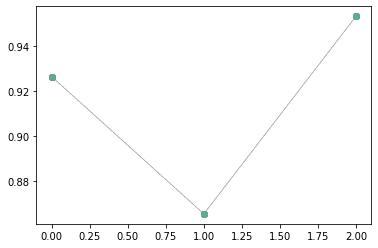

In [29]:
for i in range(10):
    l=[class_reports[i]['0']['f1-score'],class_reports[i]['1']['f1-score'],class_reports[i]['2']['f1-score']]
    plt.plot(l,'o--',alpha=0.5,linewidth=0.2)
    
#plt.legend(confidenc_list)

# Augment the data with some noise


In [43]:
run=4
path=f'../Recordings/sub-P004/pickled_data/{run}.pickle'

with open(path,'rb') as f:
    d=pickle.load(f)
    print('here')
    

data=d['data']


here


In [8]:
noise_x=np.random.normal(0,5,(data.shape[0],1))
noise_y=np.random.normal(15,10,(data.shape[0],1))
noise_z=np.random.normal(0,5,(data.shape[0],1))

In [9]:

augmented_data_x=data[:,0]+noise_x[:,0]
augmented_data_y=data[:,1]+noise_y[:,0]
augmented_data_z=data[:,2]+noise_z[:,0]

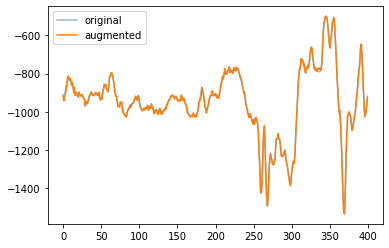

In [7]:
plt.plot(data[:400,0],alpha=0.5)
plt.plot(augmented_data[:400])
plt.legend(['original','augmented'])

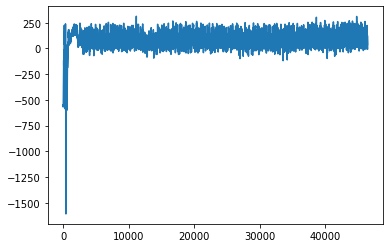

In [18]:
plt.plot(data[:,2])

In [13]:
print(np.mean(data,axis=0))

[-997.9253     11.262003   92.11954 ]


In [59]:
print(np.mean(data,axis=0))
print(np.mean(augmented_data,axis=0))

[-943.1897     25.928131  287.65912 ]
[-943.19967183   25.9577703   287.63827827]


In [26]:

for i in range(2,23):
    path=f'../Recordings/sub-P005/pickled_data/{i}.pickle'
    with open(path,'rb') as f:
        d=pickle.load(f)
        print('here')
    data=d['data']
    noise_x=np.random.normal(0,4,(data.shape[0],1))
    noise_y=np.random.normal(np.random.randint(-30,30),15,(data.shape[0],1))
    noise_z=np.random.normal(0,10,(data.shape[0],1))
    augmented_data=np.empty((data.shape[0],3))
    augmented_data[:,0]=data[:,0]+noise_x[:,0]
    augmented_data[:,1]=data[:,1]+noise_y[:,0]
    augmented_data[:,2]=data[:,2]+noise_z[:,0]
    d['data']=augmented_data
    save_path=f'../Recordings/sub-P005/aug_data/{i}_augmented.pickle'
    with open(save_path,'wb') as f:
        pickle.dump(d,f)     

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


here


Text(0.5, 1.0, 'Y axis data with noise')

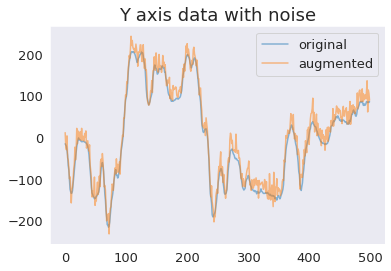

In [51]:
run=4
path=f'../Recordings/sub-P004/aug_data/{run}_augmented.pickle'

with open(path,'rb') as f:
    d=pickle.load(f)
    print('here')
d=d['data']
plt.plot(data[500:1000,1],alpha=0.5)
plt.plot(d[500:1000,1],alpha=0.5)
plt.legend(['original','augmented'])
plt.title('Y axis data with noise')

In [3]:
noise=np.random.normal(0,5,(500,1))

In [5]:
data=pickle.load(open('../models/Data_based_models/CNN7/history.pickle','rb'))

print(data.keys())

dict_keys(['train_loss', 'test_loss', 'train_acc', 'test_acc', 'labels', 'outputs'])


In [69]:
print(classification_report(data['labels'][59],data['outputs'][59]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3955
           1       0.98      0.98      0.98      4147
           2       0.99      0.98      0.99      4319
           3       0.94      0.97      0.95       282
           4       0.96      0.96      0.96       325

    accuracy                           0.98     13028
   macro avg       0.97      0.98      0.97     13028
weighted avg       0.98      0.98      0.98     13028



In [6]:
history={'train_loss':[[] for i in range(5)],'train_acc':[[] for i in range(5)],'val_loss':[[] for i in range(5)],'val_acc':[[] for i in range(5)],'labels':[[] for i in range(5)],'outputs':[[] for i in range(5)]}

In [72]:
def speeds(label):
    if label==0:
        label=1.0
    elif label==1:
        label=1.25
    elif label==2:
        label=1.5
    elif label==3:
        label=0.5
    elif label==4:
        label=0.75
    return label

In [88]:
for i in range(len(data['labels'])):
    for j in range(len(data['labels'][i])):
        #data['labels'][i][j]=speeds(data['labels'][i][j])
        #data['outputs'][i][j]=speeds(data['outputs'][i][j])

KeyError: 'labels'

In [74]:
print(len(data['train_loss']))

75


In [7]:
j=0
for i in range(len(data['train_loss'])):
    
    history['train_loss'][j].append(data['train_loss'][i])
    history['train_acc'][j].append(data['train_acc'][i])
    history['val_loss'][j].append(data['test_loss'][i])
    history['val_acc'][j].append(data['test_acc'][i])
    history['labels'][j].append(data['labels'][i])
    history['outputs'][j].append(data['outputs'][i])
    if (i+1)%30==0 and i!=0:
        j+=1


In [8]:
print(len(history['train_loss'][0]))

30


In [18]:
from sklearn.metrics import mean_squared_error

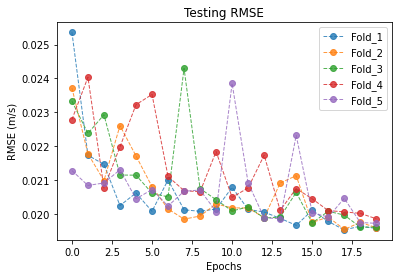

In [83]:
for i in range(5):
    rmse=[mean_squared_error(history['labels'][i][j],history['outputs'][i][j]) for j in range(len(history['labels'][i]))]
    plt.plot(rmse,'o--',alpha=0.8,linewidth=1)
    plt.legend(['Fold_1','Fold_2','Fold_3','Fold_4','Fold_5'],loc='upper right')
    plt.title('Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE (m/s)')

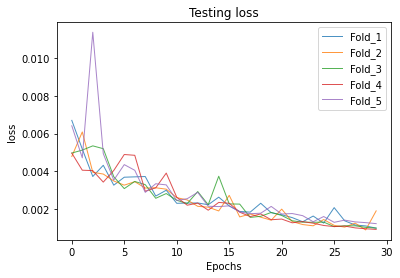

In [78]:
for i in range(5):
    plt.plot(history['val_loss'][i][:],'-',alpha=0.8,linewidth=1)
    plt.legend(['Fold_1','Fold_2','Fold_3','Fold_4','Fold_5'],loc='best')
    plt.title('Testing loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')

In [25]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('font', size=10)          # controls default text sizes

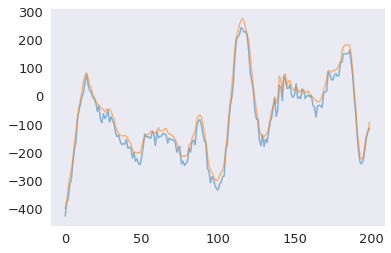

In [71]:
data1=pickle.load(open("../Recordings/sub-P003/aug_data/1_augmented.pickle","rb"))
data2=pickle.load(open("../Recordings/sub-P003/pickled_data/1.pickle","rb"))

plt.plot(data1['data'][1000:1200,1],alpha=0.5)
plt.plot(data2['data'][1000:1200,1],alpha=0.5)

In [77]:
data,header=xdf.load_xdf("../Recordings/Testing/sub-P004/sub-test1_ses-S001_task-Default_run-004_eeg.xdf")

for stream in data:
    #print(stream['info']['name'][0])
    if stream['info']['name'][0]=='classification':
        print('here')
        speeds=stream['time_series']
    if stream['info']['name'][0]=='old':
        print('here')
        old=stream['time_series']
        print('old')


here
here
old


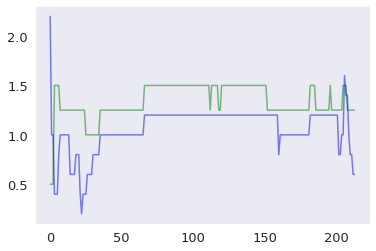

In [78]:
plt.plot(speeds,'g',alpha=0.5)
plt.plot(old,'b',alpha=0.5)

In [25]:
g=np.ones((100,100,100))
print(g[0:1])

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]
